# Модель TF-IDF

##  Импорт библиотек

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='whitegrid')

## Загрузка датасета


In [2]:
data = pd.read_csv("data/preprocessed/issue_data_encoded_small.csv")

In [3]:
# Первые пять элементов выборки
data.head()

,labels,text
0,3,"Encoding issue. Great project, I am testing ou..."
1,2,Update with feedback from Connor. All the comm...
2,2,ProductInventory. Description Describe what d...
3,1,Docs for `IConstructorSelector` optimization. ...
4,3,New user options table does not support (error...


In [4]:
# Размер набора данных
data.shape

(80000, 2)

In [5]:
# Количество экземляров каждого класса
data.labels.value_counts()

3    20000
2    20000
1    20000
0    20000
Name: labels, dtype: int64

## Разделение на обучающую и тестовую выборки

In [6]:
# Разделение на обучающую и тестовую выбокри
X_train, X_test, y_train, y_test = train_test_split(data.text, data.labels, test_size=0.2,
                                                    random_state=7, stratify=data.labels)

In [7]:
# Размер обучающей выборки
X_train.shape

(64000,)

In [8]:
# Размер тестовой выборки
X_test.shape

(16000,)

In [9]:
# Количество экземляров каждого класса в обучающей выборки
y_train.value_counts()

1    16000
2    16000
3    16000
0    16000
Name: labels, dtype: int64

In [10]:
# Количество экземляров каждого класса в тестовой выборки
y_test.value_counts()

1    4000
2    4000
3    4000
0    4000
Name: labels, dtype: int64

## Обучение модели

In [11]:
# Создание модели
clf = Pipeline([
    ("TF-IDF Vectorizer", TfidfVectorizer()),
    ("KNN", KNeighborsClassifier())
])

In [12]:
%%time
# Обучение модели
clf.fit(X_train, y_train)

CPU times: total: 5.58 s
Wall time: 5.77 s


Pipeline(steps=[('TF-IDF Vectorizer', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])

## Проверка качества модели

In [13]:
%%time
# Получение предсказаний
y_pred = clf.predict(X_test)

CPU times: total: 35min 42s
Wall time: 37min 20s


In [14]:
# Значение меток
target_names = ['bug', 'enhancement', 'documentation', 'question']

model_names = []
f1_classes_values = []
f1_avg_values = []
acc_avg_values = []

In [15]:
# Вывод отчёта о классификации
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

          bug       0.54      0.38      0.44      4000
  enhancement       0.48      0.38      0.42      4000
documentation       0.45      0.71      0.55      4000
     question       0.49      0.45      0.47      4000

     accuracy                           0.48     16000
    macro avg       0.49      0.48      0.47     16000
 weighted avg       0.49      0.48      0.47     16000



In [16]:
# Занесение f-меры в список
model_names.append("KNN")
f1_avg_values.append(f1_score(y_test, y_pred, average="micro"))
f1_classes_values.append(f1_score(y_test, y_pred, average=None, labels=[0, 1, 2, 3]))
acc_avg_values.append(accuracy_score(y_test, y_pred))

## Применение других классификаторов

### Логистическая регрессия

In [17]:
# Создание модели
clf_Log = Pipeline([
    ("TF-IDF Vectorizer", TfidfVectorizer()),
    ("Log Reg", LogisticRegression(max_iter=1000))
])

In [18]:
%%time
# Обучение модели
clf_Log.fit(X_train, y_train)

CPU times: total: 1min 16s
Wall time: 1min 27s


Pipeline(steps=[('TF-IDF Vectorizer', TfidfVectorizer()),
                ('Log Reg', LogisticRegression(max_iter=1000))])

In [19]:
%%time
# Получение предсказаний
y_pred = clf_Log.predict(X_test)

CPU times: total: 1.45 s
Wall time: 1.63 s


In [20]:
# Вывод отчёта о классификации
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

          bug       0.70      0.77      0.73      4000
  enhancement       0.69      0.73      0.71      4000
documentation       0.81      0.71      0.76      4000
     question       0.70      0.69      0.69      4000

     accuracy                           0.72     16000
    macro avg       0.73      0.72      0.72     16000
 weighted avg       0.73      0.72      0.72     16000



In [21]:
# Занесение f-меры в список
model_names.append("Логистическая регрессия")
f1_avg_values.append(f1_score(y_test, y_pred, average="micro"))
f1_classes_values.append(f1_score(y_test, y_pred, average=None, labels=[0, 1, 2, 3]))
acc_avg_values.append(accuracy_score(y_test, y_pred))

### Метод опорных векторов

In [22]:
# Создание модели
clf_SVM = Pipeline([
    ("TF-IDF Vectorizer", TfidfVectorizer()),
    ("SVC", SVC(kernel="poly",max_iter=10000))
])

In [23]:
%%time
# Обучение модели
clf_SVM.fit(X_train, y_train)

CPU times: total: 28min 18s
Wall time: 30min 14s


C:\Conda\envs\NLP\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('TF-IDF Vectorizer', TfidfVectorizer()),
                ('SVC', SVC(kernel='poly', max_iter=10000))])

In [24]:
%%time
# Получение предсказаний
y_pred = clf_Log.predict(X_test)

CPU times: total: 1.47 s
Wall time: 1.67 s


In [25]:
# Вывод отчёта о классификации
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

          bug       0.70      0.77      0.73      4000
  enhancement       0.69      0.73      0.71      4000
documentation       0.81      0.71      0.76      4000
     question       0.70      0.69      0.69      4000

     accuracy                           0.72     16000
    macro avg       0.73      0.72      0.72     16000
 weighted avg       0.73      0.72      0.72     16000



In [26]:
# Занесение f-меры в список
model_names.append("Машина опорных векторов")
f1_avg_values.append(f1_score(y_test, y_pred, average="micro"))
f1_classes_values.append(f1_score(y_test, y_pred, average=None, labels=[0, 1, 2, 3]))
acc_avg_values.append(accuracy_score(y_test, y_pred))

### Наивный байесовский классификатор

In [27]:
# Создание модели
clf_NB = Pipeline([
    ("TF-IDF Vectorizer", TfidfVectorizer()),
    ("Naive Bayes", MultinomialNB())
])

In [28]:
%%time
# Обучение модели
clf_NB.fit(X_train, y_train)

CPU times: total: 6.81 s
Wall time: 7.79 s


Pipeline(steps=[('TF-IDF Vectorizer', TfidfVectorizer()),
                ('Naive Bayes', MultinomialNB())])

In [29]:
%%time
# Получение предсказаний
y_pred = clf_NB.predict(X_test)

CPU times: total: 1.55 s
Wall time: 1.73 s


In [30]:
# Вывод отчёта о классификации
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

          bug       0.66      0.71      0.69      4000
  enhancement       0.66      0.63      0.64      4000
documentation       0.80      0.63      0.71      4000
     question       0.59      0.69      0.64      4000

     accuracy                           0.67     16000
    macro avg       0.68      0.67      0.67     16000
 weighted avg       0.68      0.67      0.67     16000



In [31]:
# Занесение f-меры в список
model_names.append("Наивный байесовский классификатор")
f1_avg_values.append(f1_score(y_test, y_pred, average="micro"))
f1_classes_values.append(f1_score(y_test, y_pred, average=None, labels=[0, 1, 2, 3]))
acc_avg_values.append(accuracy_score(y_test, y_pred))

### Решеающее дерево

In [32]:
# Создание модели
clf_DT = Pipeline([
    ("TF-IDF Vectorizer", TfidfVectorizer()),
    ("Tree", DecisionTreeClassifier(max_depth=6))
])

In [33]:
%%time
# Обучение модели
clf_DT.fit(X_train, y_train)

CPU times: total: 13.9 s
Wall time: 16 s


Pipeline(steps=[('TF-IDF Vectorizer', TfidfVectorizer()),
                ('Tree', DecisionTreeClassifier(max_depth=6))])

In [34]:
%%time
# Получение предсказаний
y_pred = clf_DT.predict(X_test)

CPU times: total: 1.56 s
Wall time: 1.88 s


In [35]:
# Вывод отчёта о классификации
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

          bug       0.75      0.47      0.58      4000
  enhancement       0.35      0.93      0.51      4000
documentation       0.81      0.37      0.51      4000
     question       0.85      0.24      0.37      4000

     accuracy                           0.50     16000
    macro avg       0.69      0.50      0.49     16000
 weighted avg       0.69      0.50      0.49     16000



In [36]:
# Занесение f-меры в список
model_names.append("Дерево решений")
f1_avg_values.append(f1_score(y_test, y_pred, average="micro"))
f1_classes_values.append(f1_score(y_test, y_pred, average=None, labels=[0, 1, 2, 3]))
acc_avg_values.append(accuracy_score(y_test, y_pred))

### Случайный лес

In [37]:
# Создание модели
clf_RF = Pipeline([
    ("TF-IDF Vectorizer", TfidfVectorizer()),
    ("Random Forest", RandomForestClassifier(max_depth=6))
])

In [38]:
%%time
# Обучение модели
clf_RF.fit(X_train, y_train)

CPU times: total: 11 s
Wall time: 12.3 s


Pipeline(steps=[('TF-IDF Vectorizer', TfidfVectorizer()),
                ('Random Forest', RandomForestClassifier(max_depth=6))])

In [39]:
%%time
# Получение предсказаний
y_pred = clf_RF.predict(X_test)

CPU times: total: 2.14 s
Wall time: 2.43 s


In [40]:
# Вывод отчёта о классификации
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

          bug       0.65      0.57      0.61      4000
  enhancement       0.56      0.51      0.53      4000
documentation       0.48      0.70      0.57      4000
     question       0.58      0.45      0.50      4000

     accuracy                           0.55     16000
    macro avg       0.57      0.55      0.55     16000
 weighted avg       0.57      0.55      0.55     16000



In [41]:
# Занесение f-меры в список
model_names.append("Случайный лес")
f1_avg_values.append(f1_score(y_test, y_pred, average="micro"))
f1_classes_values.append(f1_score(y_test, y_pred, average=None, labels=[0, 1, 2, 3]))
acc_avg_values.append(accuracy_score(y_test, y_pred))

## Сравнение моделей

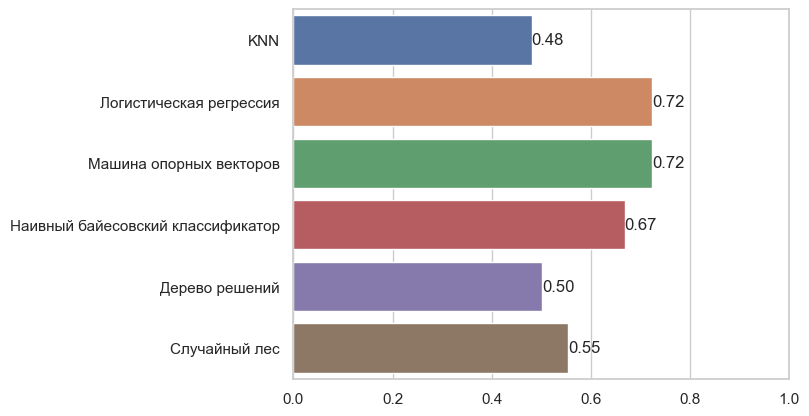

In [42]:
# Сравнение значений метрик для разных классификаторов
_, ax = plt.subplots()
sns.barplot(x=f1_avg_values, y=model_names)
ax.set_xlim(0, 1)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

In [46]:
# Создание датафрейма с метриками
full_model_names = ["TF-IDF" + " + " + model_name for  model_name in model_names]
f1_bug = [f1_classes_values[i][0] for i in range(0,len(f1_classes_values))]
f1_enh = [f1_classes_values[i][1] for i in range(0,len(f1_classes_values))]
f1_doc = [f1_classes_values[i][2] for i in range(0,len(f1_classes_values))]
f1_que = [f1_classes_values[i][3] for i in range(0,len(f1_classes_values))]

metrics_data = pd.DataFrame(data={"model" : full_model_names,
                                  "accuracy": acc_avg_values,
                                  "f1_avg" : f1_avg_values,
                                  "f1_bug" : f1_bug,
                                  "f1_enh" : f1_enh,
                                  "f1_doc" : f1_doc,
                                  "f1_que" : f1_que,
                                  "extra_processed": False},
                            index=np.arange(0, 6)
                            )

In [47]:
metrics_data

,model,accuracy,f1_avg,f1_bug,f1_enh,f1_doc,f1_que,extra_processed
0,TF-IDF + KNN,0.480687,0.480687,0.444802,0.423343,0.550073,0.473636,False
1,TF-IDF + Логистическая регрессия,0.723375,0.723375,0.733629,0.710398,0.757551,0.693811,False
2,TF-IDF + Машина опорных векторов,0.723375,0.723375,0.733629,0.710398,0.757551,0.693811,False
3,TF-IDF + Наивный байесовский классификатор,0.667750,0.667750,0.687538,0.643487,0.706767,0.638435,False
4,TF-IDF + Дерево решений,0.502250,0.502250,0.581963,0.510887,0.507740,0.370066,False
5,TF-IDF + Случайный лес,0.554500,0.554500,0.606736,0.530650,0.570174,0.503800,False


In [48]:
# Сохранение датасета
metrics_data.to_csv("data/metrics/tfidf.csv", sep=",", index=False, header=True)